In [1]:
# Import libraires

import os
import pydicom
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
# Finding files in the directory

os.listdir("/kaggle/input/rsna-breast-cancer-detection")

['sample_submission.csv',
 'train_images',
 'train.csv',
 'test.csv',
 'test_images']

In [3]:
test_labels = pd.read_csv("/kaggle/input/rsna-breast-cancer-detection/test.csv")
train_labels = pd.read_csv("/kaggle/input/rsna-breast-cancer-detection/train.csv")
train_labels.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [4]:
print(f"Train data shape: {train_labels.shape}")
print(f"Test data shape: {test_labels.shape}")

Train data shape: (54706, 14)
Test data shape: (4, 9)


In [49]:
# Number of NaN in each dataset

print(f"Number of NaNs for test data: {test_labels.isnull().sum()}")
print("\n\n")
print(f"Number of NaNs for train data: {train_labels.isnull().sum()}")

Number of NaNs for test data: site_id          0
patient_id       0
image_id         0
laterality       0
view             0
age              0
implant          0
machine_id       0
prediction_id    0
dtype: int64



Number of NaNs for train data: site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64


In [63]:
ROOT_PATH = Path("/kaggle/input/rsna-breast-cancer-detection/train_images/")
SAVE_PATH = Path("Processed")

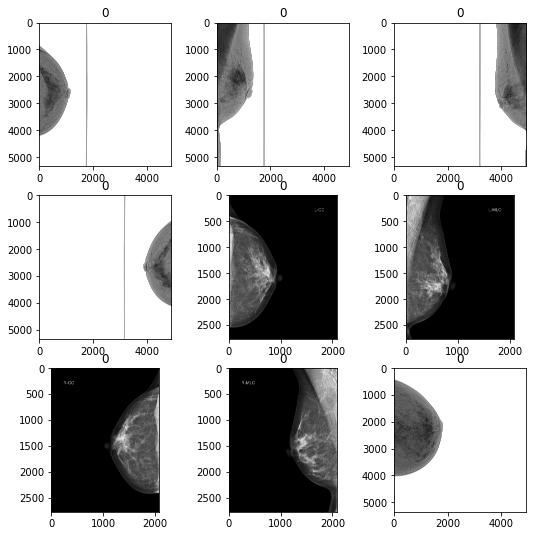

In [6]:
# Visualizing some of the samples from train images

fig, ax = plt.subplots(3, 3, figsize = (9, 9))
c = 0

for i in range(3):
    for j in range(3):
        patient_id = Path(str(train_labels["patient_id"].iloc[c]))
        folder_path = ROOT_PATH/patient_id
        image_path = folder_path/Path(str(train_labels["image_id"].iloc[c]))
        dcm_path = image_path.with_suffix(".dcm")
        dcm = pydicom.read_file(dcm_path).pixel_array
        label = train_labels["cancer"].iloc[c]
        ax[i][j].imshow(dcm, cmap = "gray")
        ax[i][j].set_title(label)
        c += 1

In [65]:
sums, sums_squarred = 0, 0

In [77]:
for c, patient_id in enumerate(train_labels):
    patient_id = Path(str(train_labels["patient_id"].iloc[c]))
    folder_path = ROOT_PATH/patient_id
    image_path = folder_path/Path(str(train_labels["image_id"].iloc[c]))
    dcm_path = image_path.with_suffix(".dcm")
    dcm = pydicom.read_file(dcm_path).pixel_array / 255
    dcm_array = cv2.resize(dcm, (224, 224)).astype(np.float16)
    label = train_labels["cancer"].iloc[c]
    train_or_val = "train" if c < 44706 else "val"
    current_save_path = SAVE_PATH/train_or_val/str(label)/str(train_labels["image_id"].iloc[c])
    current_save_path.mkdir(parents = True, exist_ok = True)
    np.save(current_save_path/patient_id, dcm_array)
    normalizer = 224 * 224
    
    if train_or_val == "train":
        sums += np.sum(dcm_array) / normalizer
        sums_squarred += (dcm_array ** 2).sum() / normalizer

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


RuntimeError: The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. GDCM), pylibjpeg (req. )